# Analysis of ABCtoolbox results of updated chromosomes

ABCtoolbox output includes:  
- retained simulations
- marginal posterior densities
- marginal posterior densities charecterisitcs
- joint posterior densities

In this Notebook, I:
- reformat the marginal posterior densities charecterisitcs file so it is easily readable
- plot a heatmap of the joint posterior densities
- calculate the probability NEA > NWA
- plot the marginal priors, truncated priors, and posterior denstities

## Setup code


In [6]:
import sys, os
sys.path.append('/vol_c/src/ABC_results_AJ/')
print(sys.executable)
print(sys.version)
print(sys.version_info)
print(sys.path)

os.chdir('/vol_c/ABC_AJmodels_update')

/opt/anaconda3/bin/python
3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)
['', '/opt/anaconda3/lib/python36.zip', '/opt/anaconda3/lib/python3.6', '/opt/anaconda3/lib/python3.6/lib-dynload', '/opt/anaconda3/lib/python3.6/site-packages', '/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/agladstein/.ipython', '/mnt/src/ABC_results_AJ/', '/vol_C/src/ABC_results_AJ/', '/vol_c/src/ABC_results_AJ/', '/vol_c/src/ABC_results_AJ/']


In [7]:
from sys import argv
import pandas as pd
# from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, style="ticks")
import numpy as np
# import rpy2
# %load_ext rpy2.ipython

from functions.assessment_functions import *

## Create PCA and density plots of summary statistics


In [9]:
%%bash
if [ -e "/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_pca.pdf" ]; then
    echo "File exists"
else 
    head -1 /vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2.txt >/vol_c/ABC_AJmodels_update/header_M2.txt
    Rscript /vol_c/src/macsswig_simsaj/dist_plot_stats.R /vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2.txt /vol_c/ABC_data/chr2/real_output_M23_IBD.summary /vol_c/ABC_AJmodels_update/header_M2.txt
fi 

[1] "/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2.txt"
[2] "/vol_c/ABC_data/chr2/real_output_M23_IBD.summary"          
[3] "/vol_c/ABC_AJmodels_update/header_M2.txt"                  
[1] "/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_params.pdf"
[1] "/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_stats.pdf"
[1] "/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_pca.pdf"
null device 
          1 
null device 
          1 
null device 
          1 


Read 204 items


In [11]:
%%bash
ls /vol_c/ABC_AJmodels_update/*pdf

/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_params.pdf
/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_pca.pdf
/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_stats.pdf
/vol_c/ABC_AJmodels_update/RMSE_input_ABC_OSG_CHTC_HPC_chr2.txt.pdf


## PLS Reduced Params

### Model 2


In [12]:
path = '/vol_c/ABC_AJmodels_update'
os.chdir(path)
abc_config_name = "test_ABC_estimate_PLS.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[BestSimsParamStats_name,
 MarginalPosteriorDensities_name,
 MarginalPosteriorCharacteristics_name,
 jointPosterior_name,
 MarginalPosteriorCharacteristics_reformat_name,
modelFit] = get_results_files(outputPrefix)
jointPosterior_name = '{}model0_jointPosterior_1_2_Obs0.txt'.format(outputPrefix)
print(BestSimsParamStats_name)
print(MarginalPosteriorDensities_name)
print(jointPosterior_name)
print(MarginalPosteriorCharacteristics_reformat_name)

test_ABC_estimate_PLS.txt
input_ABC_OSG_CHTC_HPC_chr2_transformed_10pls.txt
ABC_M2_genome_estimate_162752_10pls_1000ret_chr2_model0_BestSimsParamStats_Obs0.txt
ABC_M2_genome_estimate_162752_10pls_1000ret_chr2_model0_MarginalPosteriorDensities_Obs0.txt
ABC_M2_genome_estimate_162752_10pls_1000ret_chr2_model0_jointPosterior_1_2_Obs0.txt
ABC_M2_genome_estimate_162752_10pls_1000ret_chr2_model0_MarginalPosteriorCharacteristicsReformat.txt


In [13]:
params_str
ranges = params_str.split(',')
print(ranges)
param_indexes = []
for values in ranges:
    if '-' in values:
        x = int(values.split('-')[0].strip()) - 1
        y = int(values.split('-')[1].strip())
        param_indexes.extend(list(range(x, y)))
    else:
        param_indexes.append(int(values) -1 )
print(param_indexes)

['2-12']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


#### Reformat marginal posterior densities charecterisitcs file

In [15]:
df_chrs_reformat_pls = reformat_Characteristics(MarginalPosteriorCharacteristics_name)
df_chrs_reformat_pls

parsing ABC_M2_genome_estimate_162752_10pls_1000ret_chr2_model0_MarginalPosteriorCharacteristics.txt


/vol_c/src/ABC_results_AJ/functions/assessment_functions.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_param['param'] = param


,mode,mean,median,q50_lower,q50_upper,q90_lower,q90_upper,q95_lower,q95_upper,q99_lower,q99_upper,HDI50_lower,HDI50_upper,HDI90_lower,HDI90_upper,HDI95_lower,HDI95_upper,HDI99_lower,HDI99_upper,param
0,3.822220,4.725740,4.695120,3.898990,5.520330,3.248450,6.332100,3.137730,6.487940,3.03087,6.649450,3.504540,5.096100,3.130810,6.194130,3.052490,6.382310,3.000000e+00,6.604030,Log10_NWA
0,5.854550,5.367860,5.369410,4.777700,5.961640,4.234510,6.488520,4.133850,6.581080,4.03132,6.672810,4.820760,6.004550,4.259090,6.512400,4.158390,6.604550,4.046520e+00,6.686360,Log10_NEA
0,3.264340,3.287420,3.282490,3.026370,3.543120,2.663830,3.927730,2.547280,4.054710,2.32524,4.308900,3.015990,3.532300,2.654750,3.917030,2.547150,4.054550,2.298460e+00,4.280330,Log10_NAg
0,5.242420,5.086530,5.126900,4.731810,5.484840,4.164940,5.846900,3.987320,5.914770,3.66196,5.980720,4.863640,5.603550,4.348480,5.971130,4.142880,5.984850,3.789270e+00,6.000000,Log10_NJ
0,5.060610,4.967030,4.999310,4.603640,5.367450,4.032500,5.778570,3.851340,5.868120,3.50507,5.967480,4.682160,5.439390,4.147100,5.863640,4.015150,5.979230,3.642790e+00,6.000000,Log10_NM
0,0.232324,0.459608,0.447398,0.241071,0.671009,0.067459,0.891533,0.037424,0.935852,0.00839,0.984091,0.126263,0.544296,0.035354,0.853202,0.005051,0.896163,8.852980e-07,0.970289,m
0,513.131000,615.908000,580.528000,495.880000,703.827000,423.694000,941.733000,412.481000,1013.420000,402.63000,1126.010000,428.283000,604.405000,400.000000,851.395000,400.000000,941.733000,4.000000e+02,1085.840000,TEM
0,32.121200,28.728500,29.015400,25.357100,32.215500,21.716300,34.928600,21.009300,35.407200,20.24980,35.867700,27.588300,34.141400,22.343400,35.448500,21.640300,35.919200,2.046640e+01,36.000000,TA
0,291.432000,322.037000,311.203000,201.695000,427.962000,79.165400,608.409000,54.045000,673.698000,28.65500,813.742000,180.335000,405.013000,43.478400,556.455000,21.000000,608.409000,2.100000e+01,755.492000,TMJ
0,13.959600,14.565200,14.312600,9.275610,19.520800,4.117930,26.157200,3.178190,28.081800,2.26473,31.412400,8.626260,18.842600,2.809510,24.464600,2.000000,26.157200,2.000000e+00,30.161600,TAEW


In [16]:
prior_pls = pd.read_csv(simName, sep = '\t')
prior_pls.head()

,daf,Log10_NWA,Log10_NEA,Log10_NAg,Log10_NJ,Log10_NM,m,TEM,TA,TMJ,...,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9,LinearCombination_10
0,0.071847,5.91514,5.82727,3.97635,5.45455,4.81818,0.303031,553.535,25.9798,342.273,...,1.29954,2.982710,-2.396540,-1.43707,-0.006138,2.30511,2.640410,1.869780,-0.385853,1.92512
1,0.065505,5.01818,5.47273,4.25871,5.00000,4.45456,0.262627,408.081,23.2323,258.980,...,6.87122,-2.159700,-2.444110,-3.95087,0.887258,2.34338,1.345120,2.177460,0.365694,-1.06597
2,0.058566,3.14953,5.85455,2.94101,4.69697,5.84848,0.484849,545.455,26.9495,354.172,...,-1.57939,-7.375700,0.649620,1.90260,1.721050,1.64795,2.906750,2.674740,-0.007065,1.49132
3,0.084823,4.04646,6.12727,3.27045,4.87879,3.84850,0.696970,707.071,23.5556,282.778,...,3.45996,0.176021,-0.386571,1.03542,0.570375,1.36536,-0.849521,1.388570,-1.833470,2.43083
4,0.074205,4.15857,5.93636,3.92932,5.96970,5.63636,0.505051,424.242,23.8788,235.182,...,5.53624,0.384806,-3.146940,1.01576,0.581075,-2.16016,-0.092262,0.436462,-1.799490,1.42754


In [17]:
# param_indexes = get_param_indexes(params_str)
print(param_indexes)
params = get_col_names(param_indexes, prior_pls)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [18]:
truncated_pls = pd.read_csv(BestSimsParamStats_name, sep = '\t')
truncated_pls.head()

,Sim_num,Dist,Log10_NWA,Log10_NEA,Log10_NAg,Log10_NJ,Log10_NM,m,TEM,TA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,309,23.8375,4.19595,5.80000,3.27045,4.93939,5.39394,0.565657,585.859,29.6970,...,12.07730,2.702330,2.770530,0.111615,4.57513,2.69498,-3.425050,-1.838840,-0.521338,-4.057980
1,1307,21.6482,3.78483,4.84545,3.64699,5.72727,4.66667,0.545455,553.535,21.9394,...,12.38060,2.365230,2.590370,0.048540,3.69929,2.25276,-3.121680,-2.009100,-0.834525,-3.213720
2,1324,20.9475,3.85962,6.67273,3.22350,5.84848,4.39394,0.525253,973.737,26.1414,...,6.53927,0.890276,2.794600,-0.339920,3.93221,2.62211,-0.631185,0.072875,0.471470,-1.869090
3,1343,16.5668,3.41111,6.34545,3.69399,4.69697,5.78788,0.868687,480.808,32.2828,...,8.91150,2.302810,2.966620,-0.331438,3.65470,2.55295,-2.212010,-0.535829,-1.147540,-3.117020
4,1377,19.7876,5.98989,6.01818,4.49399,5.27273,5.60606,0.121213,860.606,20.6465,...,9.28042,0.415217,0.866321,-3.043940,2.77292,2.45892,-1.902030,0.200753,0.588435,-0.470971


In [19]:
posterior_pls = pd.read_csv(MarginalPosteriorDensities_name, sep = '\t')
posterior_pls.head()

,number,Log10_NWA,Log10_NWA.density,Log10_NEA,Log10_NEA.density,Log10_NAg,Log10_NAg.density,Log10_NJ,Log10_NJ.density,Log10_NM,...,TEM,TEM.density,TA,TA.density,TMJ,TMJ.density,TAEW,TAEW.density,Tm,Tm.density
0,1,3.00000,0.156574,4.00000,0.151700,2.00000,0.002884,3.00000,0.000228,3.00000,...,400.000,0.001901,20.0000,0.018691,21.0000,0.000629,2.00000,0.018251,3.00000,0.003623
1,2,3.03737,0.170207,4.02727,0.165759,2.04516,0.004378,3.03030,0.000311,3.03030,...,408.081,0.002046,20.1616,0.020571,31.8173,0.000710,2.32323,0.019884,3.32323,0.004122
2,3,3.07475,0.183887,4.05455,0.180092,2.09031,0.006542,3.06061,0.000421,3.06061,...,416.162,0.002187,20.3232,0.022507,42.6345,0.000795,2.64646,0.021536,3.64646,0.004664
3,4,3.11212,0.197484,4.08182,0.194596,2.13547,0.009622,3.09091,0.000564,3.09091,...,424.242,0.002323,20.4848,0.024487,53.4518,0.000885,2.96970,0.023194,3.96970,0.005249
4,5,3.14949,0.210867,4.10909,0.209167,2.18062,0.013932,3.12121,0.000748,3.12121,...,432.323,0.002452,20.6465,0.026496,64.2691,0.000977,3.29293,0.024845,4.29293,0.005876


TypeError: cannot convert the series to <class 'float'>

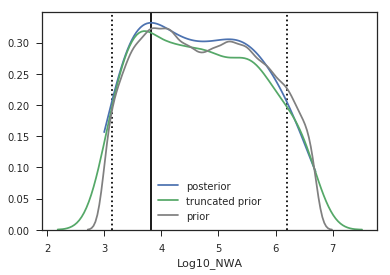

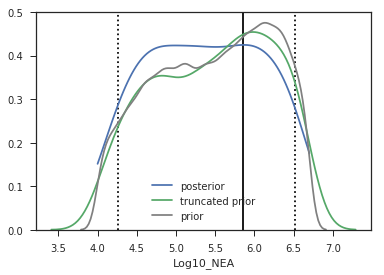

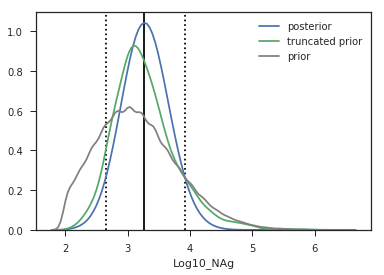

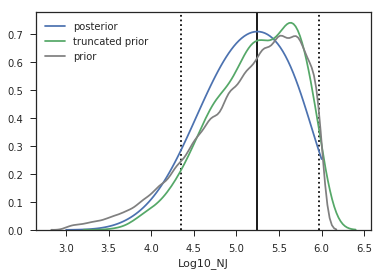

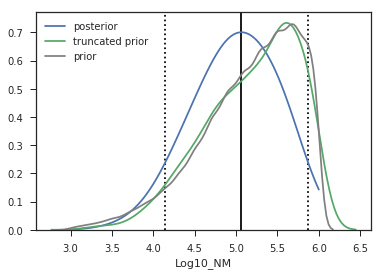

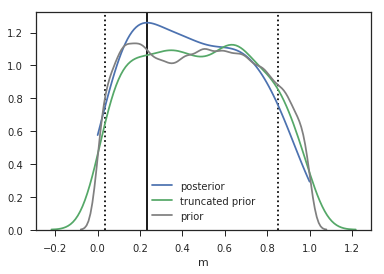

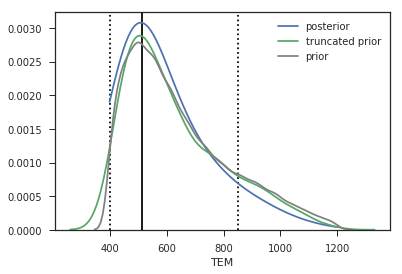

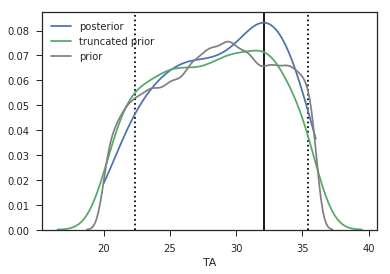

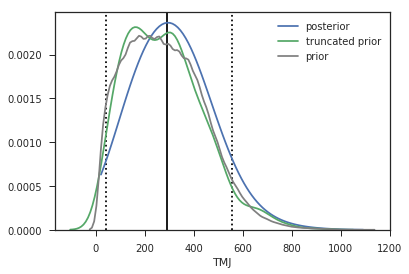

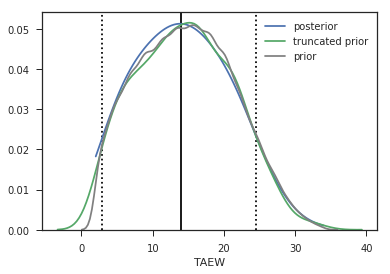

In [20]:
for param in params:
    plot_param_densities(posterior_pls, truncated_pls, prior_pls, df_chrs_reformat_pls, param)

#### Joint density plot

Create joint density dataframe

In [21]:
joint_NEA_NWA_df_pls = create_joint_df(jointPosterior_name)
joint_NEA_NWA_df_pls.head()

,number,Log10_NWA,Log10_NEA,density,HDI
0,0,3.00000,4.0,2.59815,0.998374
1,1,3.03737,4.0,2.80692,0.997747
2,2,3.07475,4.0,3.01398,0.996990
3,3,3.11212,4.0,3.21730,0.996045
4,4,3.14949,4.0,3.41492,0.994625


In [22]:
prob = get_prob_NEA_grtr_NWA(joint_NEA_NWA_df_pls)
print(prob)

0.6853670312473815


/vol_c/src/ABC_results_AJ/functions/assessment_functions.py:246: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Z = z.reshape(len(NEA), len(NWA))


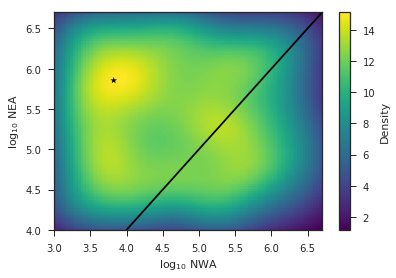

In [23]:
plot_joint_mtpltlb(joint_NEA_NWA_df_pls, df_chrs_reformat_pls)